# E-Commerce Business Insights
<img src="images/dashboard1.png" width="800">
<img src="images/dashboard2.png" width="800">



# Project Overview
* Query data from BigQuery's public dataset
* Understand the business through data exploration
* Identify key drivers of KPI with Statistical Inferences
* Make recommendations to create value for the business
* Build dashboard to communicate findings

**Skills:**
* GCP, BigQuery, SQL, Python, ETL, Statistics, PowerBI
* Pandas, Numpy, SciPy, Google Cloud API, Matplotlib, Seaborn

## Dataset
For this project, I will be using the Fictitious E-Commerce Dataset ["thelook_ecommerce"](https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=thelook_ecommerce&page=dataset&project=fiery-nimbus-360723) from Google BigQuery. This dataset contains detailed information about:
* `distribution_centers`,
* `events`,
* `inventory_items`,
* `order_items`,
* `orders`,
* `products`,
* `users`

The dataset has been collected from a large online retailer and represents a real-life scenario for a retail business. With a large number of tables and a large volume of data, this dataset provides a good representation of a typical retail business and offers a great opportunity to apply a variety of data analysis techniques to uncover insights.

![](thelook_ecommerce.png)


## Tasks
1. **Data Exploration:**
* Familiarise with the e-commerce dataset, including tables and columns.
* Calculate key performance indicators (KPIs).
* Identify business questions that can be answered to create value for the business.

2. **Data Gathering & Cleaning for Statistical Analysis:**
* Identify and extract relevant tables for data analysis.
* Clean and validate data.

3. **Statistical Analysis:**
* Visualise the distributions and summary statistics
* Conduct hypothesis tests to determine if there are significant differences between groups.
* Identify major drivers of the e-commerce KPIs.

4. **Insights Dashboard:**
* Use Power BI to create a dashboard of business insights

## Packages

In [1]:
# Data processing
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (8,5)
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 16
sns.set_style("white", {"axes.spines.right": False, "axes.spines.top": False, "axes.spines.left": False})
sns.set_palette(['#0068ff'])

# Statistical inferences, reduce skew
import numpy as np
from scipy import stats
from scipy.stats import skew, kurtosis

# BigQuery API
from google.cloud import bigquery 
import pandas_gbq
import os

In [2]:
# Create BigQuery client
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = r"C:\Users\jacks\Desktop\creds\project1-377309-08657d2eb093.json"
client = bigquery.Client()

# Data Exploration
I need to have an overview of the tables in the dataset to gain an understanding of the business, which can allow me to plan on how to create value for the business by uncovering new opportunities and areas for improvement.

### Schema

In [3]:
q = """
select 
    table_name, 
    column_name,
    data_type
from bigquery-public-data.thelook_ecommerce.INFORMATION_SCHEMA.COLUMNS
"""

schema_df = pd.read_gbq(q)
schema_df

,table_name,column_name,data_type
0,users,id,INT64
1,users,first_name,STRING
2,users,last_name,STRING
3,users,email,STRING
4,users,age,INT64
...,...,...,...
68,events,postal_code,STRING
69,events,browser,STRING
70,events,traffic_source,STRING
71,events,uri,STRING


In [23]:
# View total number of rows
q = """
SELECT 
    table_id,
    row_count
FROM bigquery-public-data.thelook_ecommerce.__TABLES__
"""

pd.read_gbq(q)

,table_id,row_count
0,distribution_centers,10
1,events,2425903
2,inventory_items,489687
3,order_items,181465
4,orders,125170
5,products,29120
6,users,100000


In [24]:
# Preview and understand each table
q = """
select *
from bigquery-public-data.thelook_ecommerce.users
limit 5;
"""
pd.read_gbq(q)

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at
0,99674,Anthony,Salinas,anthonysalinas@example.com,38,M,Mie,7670 Patricia Row Suite 085,513-0836,Suzuka City,Japan,34.851814,136.508713,Search,2019-02-24 09:56:00+00:00
1,1725,Marie,Williams,mariewilliams@example.net,16,F,Acre,774 Cox Expressway,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Search,2019-08-18 01:59:00+00:00
2,5778,Christopher,Clayton,christopherclayton@example.com,13,M,Acre,3762 Smith Brook Suite 186,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Search,2021-03-06 05:17:00+00:00
3,12696,Benjamin,Lee,benjaminlee@example.org,69,M,Acre,237 Allison Shores,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Display,2020-08-17 10:03:00+00:00
4,19039,Lance,Carter,lancecarter@example.com,41,M,Acre,272 Amy Via,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Search,2021-04-27 07:50:00+00:00


## Sales and profit margin

In [25]:
q = """
select
    extract(year from o.created_at) as year,
    extract(quarter from o.created_at) as quarter,
    sum(num_of_item * cost) as costs,
    sum(num_of_item * retail_price) as sales,
    sum(num_of_item * (retail_price - cost)) as profit,
    sum(num_of_item * (retail_price - cost)) / sum(num_of_item * retail_price) as profit_margin

from bigquery-public-data.thelook_ecommerce.orders as o
join bigquery-public-data.thelook_ecommerce.order_items as oi
on o.order_id = oi.order_id
join bigquery-public-data.thelook_ecommerce.products as p
on p.id = oi.product_id

group by year, quarter
order by year, quarter
"""

df = pd.read_gbq(q)
df.head()

,year,quarter,costs,sales,profit,profit_margin
0,2019,1,17217.379657,34946.249991,17728.870335,0.507318
1,2019,2,52163.129196,108435.130236,56272.001040,0.518946
2,2019,3,100279.183336,208959.250303,108680.066967,0.520102
3,2019,4,144259.109108,301407.420098,157148.310990,0.521382
4,2020,1,179792.613112,374805.740428,195013.127316,0.520305


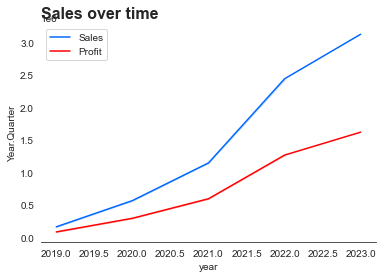

In [26]:
plt.title('Sales over time', loc='left')
sns.lineplot(x=df.year, y=df.sales, label='Sales', ci=False)
sns.lineplot(x=df.year, y=df.profit, color='red', label='Profit', ci=False)
plt.ylabel('Sales')
plt.ylabel('Year.Quarter')
plt.legend();

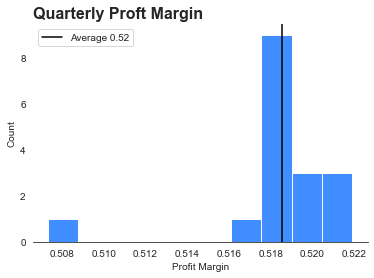

In [27]:
plt.title('Quarterly Proft Margin', loc='left')
sns.histplot(df.profit_margin)
plt.xlabel('Profit Margin')
plt.axvline(df.profit_margin.mean(), color='k', label='Average {:.2f}'.format(df.profit_margin.mean()))
plt.legend();

## Total profit per customer

In [28]:
q = """
select
    o.user_id,
    count(distinct o.order_id) as num_orders,
    sum(num_of_item * sale_price) as sales,
    sum(num_of_item * (sale_price - cost)) as profit,
    sum(num_of_item * (sale_price - cost)) / count(distinct o.order_id) as avg_profit_per_order

from 
    bigquery-public-data.thelook_ecommerce.order_items  as o
join 
    bigquery-public-data.thelook_ecommerce.orders as ord
on
    o.order_id = ord.order_id
join bigquery-public-data.thelook_ecommerce.products as p
on
    o.product_id = p.id
group by 
    user_id

order by profit desc
"""

df1 = pd.read_gbq(q)
df1.head(10)

,user_id,num_orders,sales,profit,avg_profit_per_order
0,49749,4,5828.779995,3130.094113,782.523528
1,78314,3,5587.900002,3073.060495,1024.353498
2,49704,2,4784.400009,2762.366526,1381.183263
3,2959,1,4652.000000,2674.015996,2674.015996
4,35504,4,4821.239981,2657.035005,664.258751
5,48846,3,5192.189987,2649.020377,883.006792
6,58806,3,5136.379999,2627.552994,875.850998
7,57901,1,4709.799988,2626.324394,2626.324394
8,4151,3,4584.500000,2602.232498,867.410833
9,24700,1,4494.960022,2600.495366,2600.495366


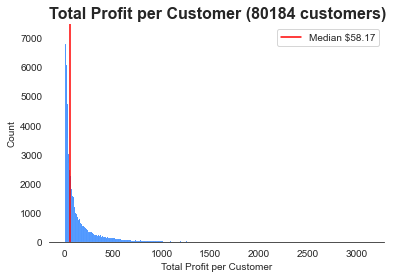

In [29]:
plt.title('Total Profit per Customer ({} customers)'.format(len(df1)), loc='left')

sns.histplot(x=df1.profit)
plt.xlabel('Total Profit per Customer')
plt.axvline(df1.profit.median(), color='r', label='Median ${:.2f}'.format(df1.profit.median()))
plt.legend();

## Frequency and Value of subsequent orders

In [30]:
q = """
with customer_orders as (
  select 
    user_id, 
    date(created_at) as date, 
    order_id, 
    row_number() over (partition by user_id order by created_at) as order_number, 
    num_of_item
  from 
    `bigquery-public-data.thelook_ecommerce.orders`
  
), 
order_intervals as (
  select 
    *, 
    ifnull(date_diff(date, lag(date) over (partition by user_id order by date), day), null) as days_from_last_order
  from customer_orders
),
order_profit as (
  select 
    o.order_id, 
    oi.num_of_item, 
    retail_price, 
    cost, 
    (retail_price - cost) * num_of_item as profit, 
    brand, 
    name, 
    category
  from order_intervals as oi 
  join `bigquery-public-data.thelook_ecommerce.order_items` as o 
    on oi.order_id = o.order_id 
  join `bigquery-public-data.thelook_ecommerce.products` as p 
    on o.product_id = p.id
)
select 
  int.user_id, 
  age,
  date, 
  p.order_id, 
  order_number, 
  days_from_last_order, 
  int.num_of_item, 
  round(retail_price, 2) as price, 
  round(cost, 2) as cost, 
  round(profit, 2) as profit, 
  brand, 
  category
from order_intervals as int 
join order_profit as p 
on int.order_id = p.order_id 
join bigquery-public-data.thelook_ecommerce.users
on users.id = int.user_id
order by user_id, order_number
"""

rfm = pd.read_gbq(q)
rfm.head()


,user_id,age,date,order_id,order_number,days_from_last_order,num_of_item,price,cost,profit,brand,category
0,1,28,2019-08-04,1,1,<NA>,1,49.99,24.70,25.29,Wrangler,Jeans
1,2,70,2022-10-26,2,1,<NA>,3,330.00,137.61,577.17,Levi's,Outerwear & Coats
2,2,70,2022-10-26,2,1,<NA>,3,39.50,21.29,54.63,Rusty,Shorts
3,2,70,2022-10-26,2,1,<NA>,3,59.50,34.81,74.08,Element,Fashion Hoodies & Sweatshirts
4,5,55,2022-07-09,3,1,<NA>,1,89.99,32.76,57.23,Sutton Studio,Blazers & Jackets


In [31]:
rfm.groupby('order_number')[['profit', 'days_from_last_order']].agg({
    'profit': ['sum', 'mean', 'median', 'std'],
    'days_from_last_order': ['mean', 'median', 'std']})


profit                               days_from_last_order  \
                     sum       mean  median        std                 mean   
order_number                                                                  
1             6824562.93  58.650925  32.840  85.317678                 <NA>   
2             2508056.53  57.925459  32.760  84.952656           216.840478   
3              835440.85  57.920192  32.765  83.874324           166.422352   
4              426708.38  57.788242  32.665  78.690228           148.746885   

                                 
             median         std  
order_number                     
1              <NA>         NaN  
2             136.0  232.325267  
3             100.0  184.308866  
4              88.0  169.847126

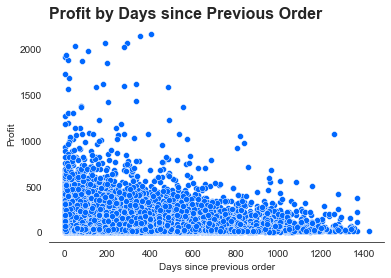

In [32]:
sns.scatterplot(x=rfm.days_from_last_order, y=rfm.profit)
plt.title('Profit by Days since Previous Order', loc='left')
plt.ylabel('Profit')
plt.xlabel('Days since previous order');

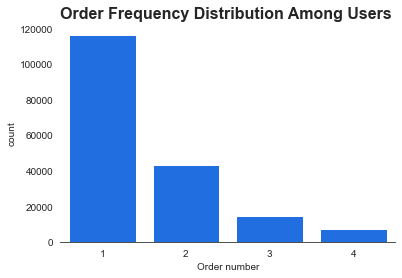

In [33]:
sns.countplot(x='order_number', data=rfm, color='#0068ff')
plt.title('Order Frequency Distribution Among Users', loc='left')
plt.xlabel('Order number');

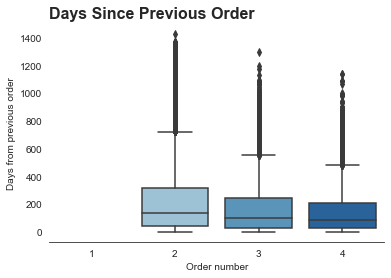

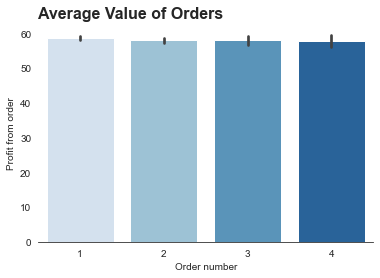

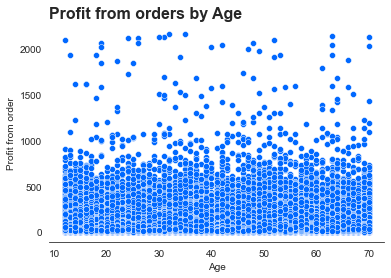

In [34]:
plt.title('Days Since Previous Order', loc='left')
sns.boxplot(data=rfm, x='order_number', y='days_from_last_order', palette='Blues')
plt.xlabel('Order number')
plt.ylabel('Days from previous order')
plt.show()


plt.title('Average Value of Orders', loc='left')
sns.barplot(data=rfm, x='order_number', y='profit', palette='Blues')
plt.xlabel('Order number')
plt.ylabel('Profit from order')
plt.show();

plt.title('Profit from orders by Age', loc='left')
sns.scatterplot(data=rfm, x='age', y='profit', palette='Blues')
plt.xlabel('Age')
plt.ylabel('Profit from order')
plt.show();

## Order return rate

In [35]:
q = """
select
    extract(year from created_at) as year,
    extract(month from created_at) as month,
    count(distinct order_id) as total_orders,
    sum(if(status='Returned', 1, 0)) as total_returned,
    sum(if(status='Returned', 1, 0)) / count(created_at) as return_rate
    
from bigquery-public-data.thelook_ecommerce.orders as o
group by year, month
order by year, month
"""

df2 = pd.read_gbq(q)
df2.head()

,year,month,total_orders,total_returned,return_rate
0,2019,1,23,2,0.086957
1,2019,2,57,8,0.140351
2,2019,3,128,18,0.140625
3,2019,4,184,17,0.092391
4,2019,5,221,25,0.113122


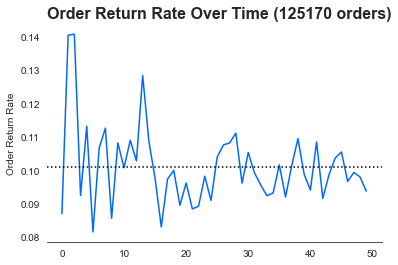

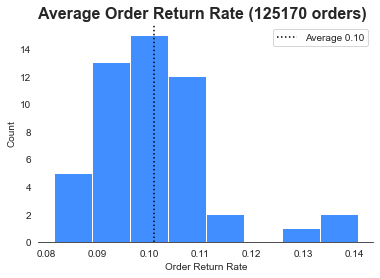

In [36]:
plt.title('Order Return Rate Over Time ({} orders)'.format(df2.total_orders.sum()), loc='left')
sns.lineplot(x=df2.index, y=df2.return_rate)
plt.axhline(df2.return_rate.mean(), color='k', ls=':',label='Average {:.2f}'.format(df2.return_rate.mean()))
plt.ylabel('Order Return Rate')
plt.show()

plt.title('Average Order Return Rate ({} orders)'.format(df2.total_orders.sum()), loc='left')
sns.histplot(df2.return_rate)
plt.xlabel('Order Return Rate')
plt.axvline(df2.return_rate.mean(), color='k', ls=':',label='Average {:.2f}'.format(df2.return_rate.mean()))
plt.legend()
plt.show()


## Revenue streams

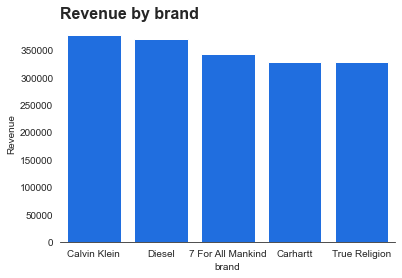

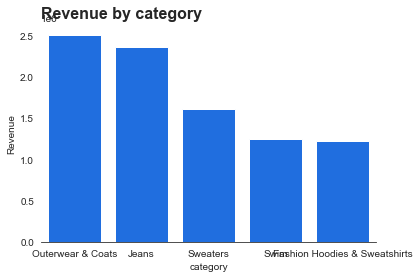

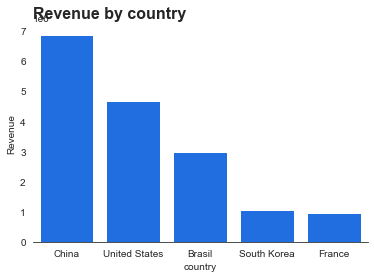

In [37]:
# Revenue Streams
rev_streams = ['brand', 'category', 'country']

for stream in rev_streams:
    q = """
    select
        {},
        sum(sale_price * num_of_item) as total_revenue

    from bigquery-public-data.thelook_ecommerce.order_items as oi
    join bigquery-public-data.thelook_ecommerce.products as p
    on oi.product_id = p.id
    join bigquery-public-data.thelook_ecommerce.orders as o
    on o.order_id = oi.order_id
    join bigquery-public-data.thelook_ecommerce.users as u
    on oi.user_id = u.id

    group by {}

    order by total_revenue desc
    limit 5
    """.format(stream, stream)

    df = pd.read_gbq(q)

    sns.barplot(x=stream, y='total_revenue', data=df, color='#0068ff')
    plt.title('Revenue by {}'.format(stream), loc='left')
    plt.xlabel(stream)
    plt.ylabel('Revenue')
    plt.show()

## Customer demographics

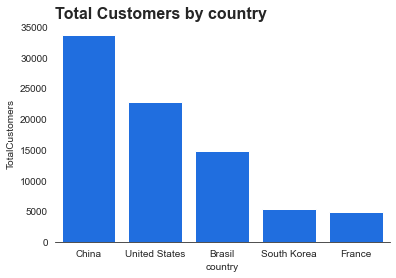

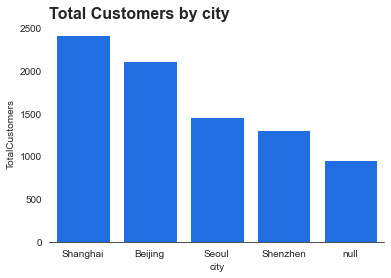

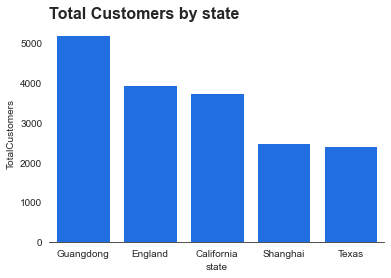

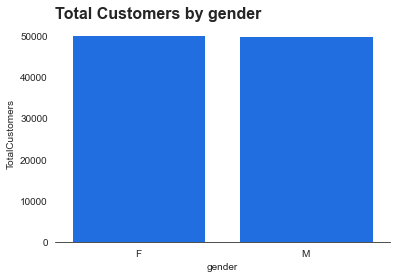

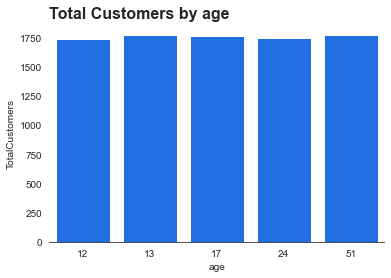

In [38]:
customer_base = ['country', 'city', 'state', 'gender', 'age']

for i in customer_base:
    q = """
    select 
        {},
        count(*) as num_customers
    from bigquery-public-data.thelook_ecommerce.users
    group by {}

    order by num_customers desc
    limit 5
    """.format(i,i)

    df = pd.read_gbq(q)
    sns.barplot(x=i, y='num_customers', data=df, color='#0068ff')
    plt.title('Total Customers by {}'.format(i), loc='left')
    plt.xlabel(i)
    plt.ylabel('TotalCustomers')
    plt.show()


## Products price relative to its average category and brand price

In [39]:
q = """
select 
    name,
    brand,
    category,
    retail_price,
    cost,
    sum(num_of_item) as total_sold,
    case
        when sum(num_of_item) >= 0 and sum(num_of_item) <= 10 then '0-10'
        when sum(num_of_item) > 10 and sum(num_of_item) <= 20 then '10-20'
        when sum(num_of_item) > 20 and sum(num_of_item) <= 30 then '20-30'
        when sum(num_of_item) > 30 and sum(num_of_item) <= 40 then '30-40'
        else '40+'
    end as bins,
    avg(retail_price) over (partition by brand, category) as avg_price_by_brand_category,
    (retail_price / avg(retail_price) over (partition by brand, category)) as relative_price

from bigquery-public-data.thelook_ecommerce.order_items as o
join bigquery-public-data.thelook_ecommerce.orders as ord
on o.order_id = ord.order_id
join bigquery-public-data.thelook_ecommerce.products as p
on p.id = o.product_id

group by name, brand, category, retail_price, cost
order by bins
"""

df = pd.read_gbq(q)
df.head()

,name,brand,category,retail_price,cost,total_sold,bins,avg_price_by_brand_category,relative_price
0,2B Metallic Wavy Sweater Skirt,2b by bebe,Skirts,26.950001,10.59135,4,0-10,30.783334,0.875474
1,2B Chalis High Low Skirt,2b by bebe,Skirts,29.950001,13.41760,2,0-10,30.783334,0.972929
2,AG Adriano Goldschmied The Hero Relaxed Fit Jean,AG Adriano Goldschmied,Jeans,185.000000,90.09500,10,0-10,171.223125,1.080462
3,AG Adriano Goldschmied Men's Protege Straight ...,AG Adriano Goldschmied,Jeans,89.000000,49.21700,4,0-10,171.223125,0.519790
4,AG Adriano Goldschmied Men's Hero Relaxed Fit ...,AG Adriano Goldschmied,Jeans,178.000000,86.50800,4,0-10,171.223125,1.039579


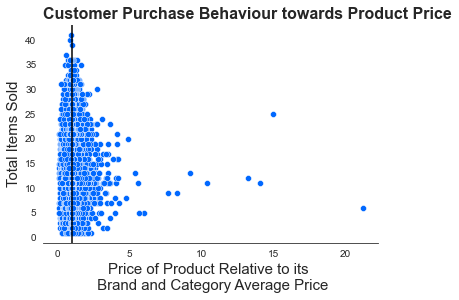

In [40]:
plt.title('Customer Purchase Behaviour towards Product Price', loc='left')
sns.scatterplot(y=df.total_sold, x=df.relative_price)
plt.xlabel('Price of Product Relative to its \n Brand and Category Average Price', fontsize=15)
plt.axvline(1, color='k')
plt.ylabel('Total Items Sold', fontsize=15);

## Profit by traffic source


In [41]:
q = """
select 
    traffic_source,
    sum(num_of_item) as items_sold,
    count(distinct o.user_id) as users,
    sum(((retail_price-cost) * num_of_item)/1000000) as profit_mils

from bigquery-public-data.thelook_ecommerce.orders as o
join bigquery-public-data.thelook_ecommerce.users as u
on o.user_id = u.id
join bigquery-public-data.thelook_ecommerce.order_items as oi
on oi.user_id = u.id
join bigquery-public-data.thelook_ecommerce.products as p
on p.id = oi.product_id

group by traffic_source
order by profit_mils
"""

df = pd.read_gbq(q)
df.head()


,traffic_source,items_sold,users,profit_mils
0,Display,25440,3304,0.762062
1,Email,31054,3987,0.939836
2,Facebook,37724,4823,1.164319
3,Organic,90251,11914,2.827063
4,Search,433094,56156,13.318490


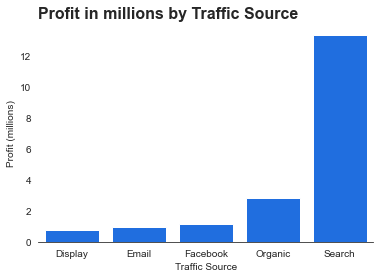

In [42]:
sns.barplot(x=df.traffic_source, y=df.profit_mils, color='#0068ff')
plt.title('Profit in millions by Traffic Source', loc='left')
plt.ylabel('Profit (millions)')
plt.xlabel('Traffic Source');

## Profit margin by email domain

In [43]:
q = """
select 
    substr(email, instr(email, '.')+1) as email_domain,
    sum(num_of_item) as items_sold

from bigquery-public-data.thelook_ecommerce.orders as o
join bigquery-public-data.thelook_ecommerce.users as u
on o.user_id = u.id
join bigquery-public-data.thelook_ecommerce.order_items as oi
on oi.user_id = u.id
join bigquery-public-data.thelook_ecommerce.products as p
on p.id = oi.product_id

group by email_domain
"""
pd.read_gbq(q)

,email_domain,items_sold
0,com,205520
1,net,207068
2,org,204975


## Top 5 profit contributor brands each year

In [44]:
q = """
with brand_profits as (
    select
        extract(year from o.created_at) as year,
        brand,
        sum((retail_price - cost) * num_of_item) as profit
    from 
        bigquery-public-data.thelook_ecommerce.orders as o
    join 
        bigquery-public-data.thelook_ecommerce.order_items as oi
    on 
        o.order_id = oi.id
    join 
        bigquery-public-data.thelook_ecommerce.products as p
    on 
        oi.product_id = p.id
    group by
        year, 
        brand
),

pct_profit as (
    select 
        *,
        sum(profit) over(partition by year) as annual_profit,
        (profit / sum(profit) over(partition by year))*100 as pct_total_profit
    from
        brand_profits
    order by 
        year, 
        pct_total_profit desc
)

select
    *,
    rank() over (partition by year order by pct_total_profit desc) as rank
from
    pct_profit
order by 
    year,
    rank;
"""

pct_profit = pd.read_gbq(q)
top_5 = pct_profit[pct_profit['rank'].isin([1,2,3,4,5])]
top_5

,year,brand,profit,annual_profit,pct_total_profit,rank
0,2019,True Religion,4155.863350,1.755954e+05,2.366727,1
1,2019,Calvin Klein,4147.800654,1.755954e+05,2.362135,2
2,2019,Diesel,3849.726258,1.755954e+05,2.192385,3
3,2019,Jones New York,2625.147162,1.755954e+05,1.494998,4
4,2019,Carhartt,2252.807592,1.755954e+05,1.282954,5
1132,2020,Calvin Klein,11876.300894,6.077843e+05,1.954032,1
1133,2020,Diesel,10397.430927,6.077843e+05,1.710711,2
1134,2020,Carhartt,9874.466760,6.077843e+05,1.624666,3
1135,2020,7 For All Mankind,8246.708830,6.077843e+05,1.356848,4
1136,2020,Tommy Hilfiger,8090.467233,6.077843e+05,1.331141,5


## Current top 5 brand's profit performance over time

In [45]:
q = """
with brand_profits as (
    select
        extract(year from o.created_at) as year,
        brand,
        sum((retail_price - cost) * num_of_item) as profit
    from 
        bigquery-public-data.thelook_ecommerce.orders as o
    join 
        bigquery-public-data.thelook_ecommerce.order_items as oi
    on 
        o.order_id = oi.id
    join 
        bigquery-public-data.thelook_ecommerce.products as p
    on 
        oi.product_id = p.id

    group by
        year, 
        brand
), 

top_5 as (
    select
        brand,
        sum(profit) as total_profit
    from 
        brand_profits
    group by 
        brand
    order by 
        total_profit desc

    limit 5
)


select 
    year,
    top_5.brand,
    profit as year_profit,
    total_profit as all_time_profit
from
    brand_profits
join top_5
on top_5.brand = brand_profits.brand

order by 
    year desc, 
    total_profit desc
"""

top_profit = pd.read_gbq(q)
top_profit.drop('year_profit',axis=1).head(5)

,year,brand,all_time_profit
0,2023,Calvin Klein,108341.345254
1,2023,Diesel,104980.506152
2,2023,Carhartt,95741.167140
3,2023,7 For All Mankind,88458.489914
4,2023,True Religion,86680.027256


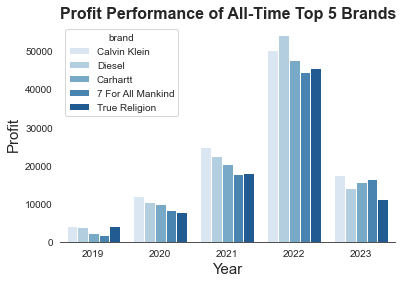

In [46]:
sns.barplot(x=top_profit.year, y=top_profit.year_profit, hue=top_profit.brand, palette='Blues');

plt.title('Profit Performance of All-Time Top 5 Brands', loc='left')
plt.ylabel('Profit', fontsize=15)
plt.xlabel('Year', fontsize=15);

## Order return rate by distribution center

In [47]:
q = """
with orders as (
    select 
        extract(year from delivered_at) as year,
        floor((extract(month from delivered_at) -1)/3)+1 as quarter,
        d.name as distribution_center,
        count(*) as total_orders,
        sum(case when status = 'Returned' then 1 else 0 end) as returned_orders,
        sum(case when status = 'Returned' then 1 else 0 end) / count(*) as order_return_rate
        
    from 
        bigquery-public-data.thelook_ecommerce.order_items as oi
    join
        bigquery-public-data.thelook_ecommerce.products as p
    on
        oi.product_id = p.id
    join
        bigquery-public-data.thelook_ecommerce.distribution_centers as d
    on
        d.id = p.distribution_center_id
        
    group by 
        year,
        quarter,
        distribution_center
        
    order by 
        year, 
        quarter
)

select 
    *,
from 
    orders
order by order_return_rate desc
"""
rr_df = pd.read_gbq(q)

rr_df['distribution_state'] = rr_df['distribution_center'].apply(lambda x: x.split()[-1])
rr_df.head()

,year,quarter,distribution_center,total_orders,returned_orders,order_return_rate,distribution_state
0,2019,1.0,Port Authority of New York/New Jersey NY/NJ,13,9,0.692308,NY/NJ
1,2019,2.0,Savannah GA,30,16,0.533333,GA
2,2019,1.0,Memphis TN,10,5,0.500000,TN
3,2019,1.0,Houston TX,14,6,0.428571,TX
4,2019,3.0,New Orleans LA,38,16,0.421053,LA


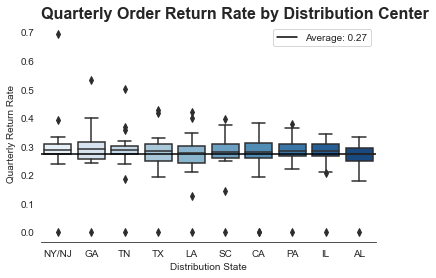

In [48]:
plt.title('Quarterly Order Return Rate by Distribution Center', loc='left')
sns.boxplot(data=rr_df, x='distribution_state', y='order_return_rate', palette='Blues')
plt.axhline(rr_df.order_return_rate.mean(), color='k', label='Average: {:.2f}'.format(rr_df.order_return_rate.mean()))
plt.legend()
plt.ylabel('Quarterly Return Rate')
plt.xlabel('Distribution State');

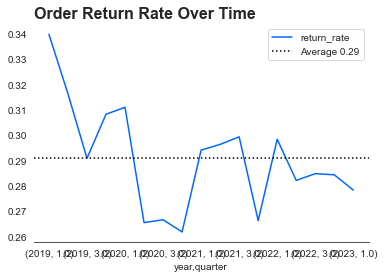

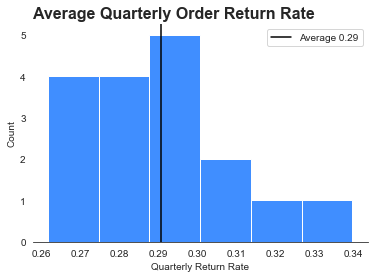

In [49]:
rr_over_time = rr_df.groupby(['year', 'quarter'])[['total_orders', 'returned_orders']].sum()
rr_over_time['return_rate'] = rr_over_time.returned_orders / rr_over_time.total_orders

plt.title('Order Return Rate Over Time', loc='left')
rr_over_time.return_rate.plot()
plt.axhline(rr_over_time.return_rate.mean(), color='k', ls=':', label='Average {:.2f}'.format(
    rr_over_time.return_rate.mean()))

plt.legend()
plt.show();

sns.histplot(rr_over_time.return_rate)
plt.title('Average Quarterly Order Return Rate', loc='left')
plt.axvline(rr_over_time.return_rate.mean(), color='k', label='Average {:.2f}'.format(rr_over_time.return_rate.mean()))
plt.xlabel('Quarterly Return Rate')
plt.legend()
plt.show();



## Inventory ratio

In [50]:
# Preview table
q = """
with cogs as (
    select
        extract(year from created_at) as year,
        extract(quarter from created_at) as quarter,
        product_distribution_center_id as distribution_id,
        sum(cost) as cost_of_goods_sold
    from 
        bigquery-public-data.thelook_ecommerce.inventory_items
    where
        sold_at is not null
    group by 
        year, quarter, product_distribution_center_id
),

coi as (
    select
        extract(year from created_at) as year,
        extract(quarter from created_at) as quarter,
        product_distribution_center_id,
        sum(cost) as cost_of_inventory
    from 
        bigquery-public-data.thelook_ecommerce.inventory_items
    group by 
        year, quarter, product_distribution_center_id
)

select 
    cogs.year, 
    cogs.quarter, 
    distribution_id, 
    cost_of_goods_sold, 
    cost_of_inventory,
    cost_of_goods_sold / cost_of_inventory as inventory_ratio
from 
    cogs
join
    coi
on
    cogs.year = coi.year 
    and cogs.quarter = coi.quarter 
    and cogs.distribution_id = coi.product_distribution_center_id

order by year, quarter, inventory_ratio
"""
inv_ratio = pd.read_gbq(q)
inv_ratio


,year,quarter,distribution_id,cost_of_goods_sold,cost_of_inventory,inventory_ratio
0,2018,4,6,103.294171,103.294171,1.000000
1,2018,4,4,75.723551,75.723551,1.000000
2,2018,4,7,360.405708,360.405708,1.000000
3,2018,4,8,37.530000,37.530000,1.000000
4,2018,4,3,85.696640,85.696640,1.000000
...,...,...,...,...,...,...
174,2023,1,9,23126.498961,44595.098327,0.518588
175,2023,1,8,43100.433147,81618.841567,0.528070
176,2023,1,2,48335.904100,91317.449615,0.529317
177,2023,1,6,32511.690448,61069.504373,0.532372


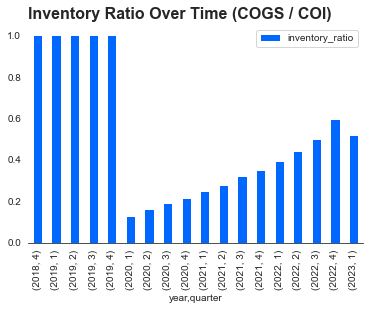

In [51]:
total_inv_df = inv_ratio.groupby(['year', 'quarter'])[['cost_of_goods_sold', 'cost_of_inventory']].sum()
total_inv_df['inventory_ratio'] = total_inv_df.cost_of_goods_sold / total_inv_df.cost_of_inventory

total_inv_df.plot(y='inventory_ratio', kind='bar')
plt.title('Inventory Ratio Over Time (COGS / COI)', loc='left');

# Data Gathering & Cleaning for Statistical Analysis
After gaining an understanding of the business from data exploration I decided to:


**1. Use CLV as target variable for hypothesis testing**
* Determines which factors have greatest impact on customer value
* Optimises marketing spend, ultimately increasing revenue


**2. Perform K-means to segment users based on RFM and demographic**
* Identifies groups of customers based on their value
* Helps the business to target high-value customers with personalised offers


**Tables needed:**
* `users`: user_id, email, age, gender, state, city, country, traffic_source
* `products`: cost, category, brand, retail_price, department, distribution_center_id
* `order_items`: order_id, product_id
* `orders`: num_of_item

In [56]:
# Query to extract user demographics detials
q = """
with order_summary as (
  select 
    orders.user_id, 
    date(max(orders.created_at)) as latest_order, 
    count(distinct orders.order_id) as order_frequency, 
    sum((sale_price-cost)*num_of_item) as total_profit
  from 
    bigquery-public-data.thelook_ecommerce.order_items order_items
  join
    bigquery-public-data.thelook_ecommerce.orders orders
  on 
    order_items.user_id = orders.user_id
  join
    bigquery-public-data.thelook_ecommerce.products p
  on 
    p.id = order_items.product_id
  group by 
    user_id
), 
user_recency as (
  select 
    user_id, 
    date_diff(current_date(), latest_order, day) as recency 
  from 
    order_summary
),

user_info as (
  select
    id,
    substr(email, instr(email, '.')+1) as email_domain,
    created_at,
    date_diff(current_date(), date(created_at), day) as days_since_user_created,
    age,
    gender,
    state,
    city,
    country,
    traffic_source
  from
    bigquery-public-data.thelook_ecommerce.users

)


select 
  total_profit,
  user_recency.user_id, 
  recency as days_since_last_order, 
  order_frequency as total_orders, 
  email_domain,
  date(created_at) as date_user_created,
  days_since_user_created,
  age,
  gender,
  state,
  city,
  country,
  traffic_source
from 
  order_summary 
join 
  user_recency 
on 
  order_summary.user_id = user_recency.user_id
join 
  user_info
on 
  order_summary.user_id = user_info.id
"""

# Project name, dataset name, view name
view_id = 'project1-377309.thelook_ecommerce.user_RFM_view'

# create a reference to the table
view = bigquery.Table(view_id)

# reference view query attribute
view.view_query = q

# Make an API request to create the view
view = client.create_table(view)
print(f"Created {view.table_type}: {str(view.reference)}")

Created VIEW: project1-377309.thelook_ecommerce.user_RFM_view


## Final Data and Schema

In [57]:
q = """
select 
    table_name, 
    column_name,
    data_type
from project1-377309.thelook_ecommerce.INFORMATION_SCHEMA.COLUMNS
where table_name = 'user_RFM_view'
"""
user_data_schema = pd.read_gbq(q)
user_data_schema


,table_name,column_name,data_type
0,user_RFM_view,total_profit,FLOAT64
1,user_RFM_view,user_id,INT64
2,user_RFM_view,days_since_last_order,INT64
3,user_RFM_view,total_orders,INT64
4,user_RFM_view,email_domain,STRING
5,user_RFM_view,date_user_created,DATE
6,user_RFM_view,days_since_user_created,INT64
7,user_RFM_view,age,INT64
8,user_RFM_view,gender,STRING
9,user_RFM_view,state,STRING


In [59]:
# Query to extract data
q = """
select * from project1-377309.thelook_ecommerce.user_RFM_view
"""
df = pd.read_gbq(q)
df.head()


,total_profit,user_id,days_since_last_order,total_orders,email_domain,date_user_created,days_since_user_created,age,gender,state,city,country,traffic_source
0,1.39250,19183,125,1,net,2019-03-31,1416,46,F,Tennessee,Jackson,United States,Organic
1,31.77226,53937,146,1,net,2021-05-22,633,48,F,Bretagne,Talensac,France,Organic
2,455.33442,61525,233,4,net,2021-04-08,677,27,M,Niedersachsen,Osterholz-Scharmbeck,Germany,Search
3,2761.75823,10579,2,4,org,2023-02-10,4,67,F,Nevada,Las Vegas,United States,Organic
4,61.61100,74803,585,1,org,2020-11-22,814,40,F,New Mexico,Albuquerque,United States,Search


In [ ]:
df.to_parquet('user_data.parquet', index=False)

# Statistical Testing

## Univariate Analysis

In [59]:
data = pd.read_parquet('user_data.parquet')
data = data.drop(['user_id', 'date_user_created'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80184 entries, 0 to 80183
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   total_profit             80184 non-null  float64
 1   days_since_last_order    80184 non-null  int64  
 2   total_orders             80184 non-null  int64  
 3   email_domain             80184 non-null  object 
 4   days_since_user_created  80184 non-null  int64  
 5   age                      80184 non-null  int64  
 6   gender                   80184 non-null  object 
 7   state                    80184 non-null  object 
 8   city                     79426 non-null  object 
 9   country                  80184 non-null  object 
 10  traffic_source           80184 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 6.7+ MB


In [60]:
def num_outliers(series):
    """
    Returns number of outliers
    * IQR method if data is skewed +/- 1
    * STD method if data is more gaussian  
    """

    if abs(skew(series)) > 1:
        q1 = series.quantile(0.25)
        q3 = series.quantile(0.75)
        iqr = q3 - q1
        upper = q3 + 1.5 * iqr
        lower = q1 - 1.5 * iqr
        return sum((series > upper) | (series < lower))
    else:
        upper = np.mean(series) + 3 * np.std(series)
        lower = np.mean(series) - 3 * np.std(series)
        return sum((series > upper) | (series < lower))
        
# Summary statistics table
def sum_stats(data):
    stats_dict = {
        'dtype': data.dtypes,
        'skew': data.select_dtypes(include=np.number).apply(lambda x: skew(x) if len(x) > 0 else '-', axis=0),
        'kurtosis': data.select_dtypes(include=np.number).apply(lambda x: kurtosis(x) if len(x) > 0 else '-', axis=0),
        'num_outliers': data.select_dtypes(include=np.number).apply(lambda x: num_outliers(x) if len(x) > 0 else '-', axis=0),
        'pct_outliers': data.select_dtypes(include=np.number).apply(lambda x: num_outliers(x) if len(x) > 0 else '-', axis=0) / data.count(),
        'nunique': data.nunique(),
        'missing': data.isnull().sum(),
        'pct_missing': data.isnull().sum() / data.count(),
        'duplicates': data.duplicated().sum(),
        'pct_duplicates': data.duplicated().sum() / data.count(),
        'mode': data.mode().iloc[0],
    }

    unistats_df = pd.concat([pd.DataFrame(stats_dict).sort_values('skew', key=abs, ascending=False).T, data.describe()])
    return unistats_df

In [61]:
sum_stats(data)

,total_profit,total_orders,days_since_last_order,days_since_user_created,age,city,country,email_domain,gender,state,traffic_source
dtype,float64,int64,int64,int64,int64,object,object,object,object,object,object
skew,4.535423,1.560719,1.23475,0.017872,-0.000522,NaN,NaN,NaN,NaN,NaN,NaN
kurtosis,33.853596,1.594232,0.909402,-1.205923,-1.196826,NaN,NaN,NaN,NaN,NaN,NaN
num_outliers,8621.0,5061.0,2351.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
pct_outliers,0.107515,0.063117,0.02932,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
nunique,63992,4,1460,1504,59,7599,16,3,2,230,5
missing,0,0,0,0,0,758,0,0,0,0,0
pct_missing,0.0,0.0,0.0,0.0,0.0,0.009543,0.0,0.0,0.0,0.0,0.0
duplicates,0,0,0,0,0,0,0,0,0,0,0
pct_duplicates,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Observations
Based on the univariate stats table, we can make the following observations:
* The `total_profit` and `avg_profit_order` columns have high skew and kurtosis, indicating that the data is not normally distributed and may need to be transformed before performing any statistical analysis.
* The `days_since_last_order` column has a low skew, indicating that the data is fairly symmetrical.
* The `city`, `date_user_created`, `most_freq_brand`, and `state` has missing values and/or too many number of unique values for analysis
* The `days_since_user_created` and `age` has very low kurtosis, indicating that the data has a flat or uniform distribution so not much information that can be gained from that feature in terms of differentiating between different samples. 

Will drop `city` and `state` becuase theres too many groups to compare means, and `city` has missing values.

In [62]:
# Remove columns
remove_list = ['city', 'state']
df1 = data.drop(remove_list, axis=1)

## Bivariate Analysis

In [63]:
def bivstats(df, label):
    # Correlation, anova, p-value results dataframe
    bivstat_df = pd.DataFrame(columns = ['Stat', '+/-', 'Effect size', 'p-value'])


    for col in df:
        if df[col].isna().sum() == 0:
            if df[col].dtype != 'object': # check if column is numerical
                # calculate correlation & p-value
                r, p = stats.pearsonr(df[col], df[label])
                bivstat_df.loc[col] = ['r', np.sign(r), round(abs(r),3), round(p,4)]

            else: # Else, Perform Kruskal-Wallis H test for multiple groups
                df1 = df.groupby(col)[label].apply(list)
                f, p = stats.kruskal(*df1)
                bivstat_df.loc[col] = ['F', '', round(f,3), round(p,4)]
        else: # If missing values = NaN
            bivstat_df.loc[col] = [np.nan, np.nan, np.nan, np.nan]
            
    return bivstat_df

In [66]:
target = 'total_profit'
bivstat_df = bivstats(df1, target)
bivstat_df = bivstat_df.drop(target,axis=0)
bivstat_df.sort_values(by=['Stat', 'Effect size', 'p-value'], ascending=False)

,Stat,+/-,Effect size,p-value
total_orders,r,1.0,0.621,0.0000
days_since_last_order,r,-1.0,0.137,0.0000
days_since_user_created,r,1.0,0.003,0.3761
age,r,-1.0,0.000,0.9635
gender,F,,95.270,0.0000
country,F,,18.867,0.2198
traffic_source,F,,3.741,0.4423
email_domain,F,,0.314,0.8548


## Observation
It is difficult to identify any key drivers of 'total profit' with high confidence due to the data being highly skewed. Effect sizes are small and many variables do not have significant differneces between groups. 
